<Axes: >

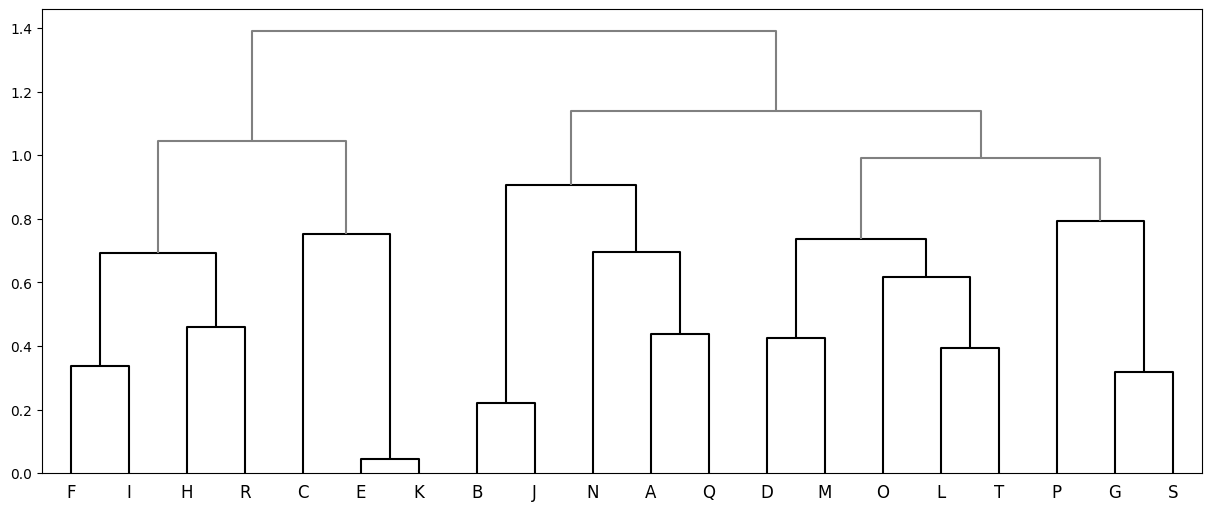

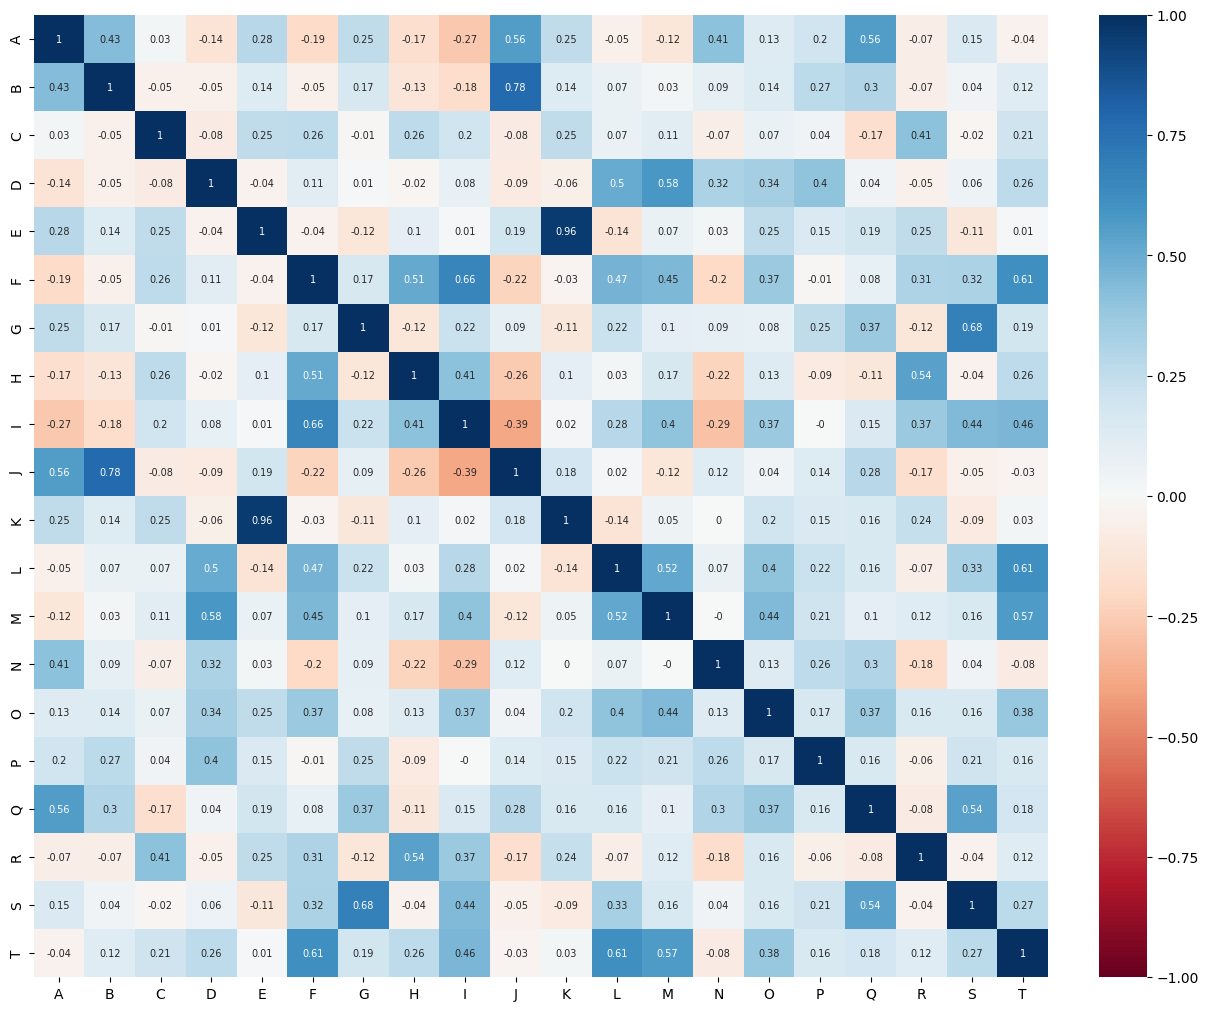

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform, pdist
import seaborn as sns 
import git

#get the Git root location
git_repo = git.Repo('.', search_parent_directories=True)
#Load the data
df = pd.read_csv(f"{git_repo.working_tree_dir}\\Data\\data.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

#Creating a list of elements
start_index = df.columns.get_loc('A')
end_index = df.columns.get_loc('T')
ELEMENTS = np.array(df.iloc[:, start_index:end_index + 1].columns)

df_data = df.iloc[:, start_index:end_index + 1]

#Calculating the correlation
corr = df_data.corr(method='spearman')

#Distance matriz
dissimilarity = 1 - corr
Z = linkage(squareform(dissimilarity), 'complete')


#Plot dendogram:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 5), layout='constrained')
hierarchy.set_link_color_palette(['#000000', '#000000', '#000000', '#000000','#000000', '#000000', '#000000', '#000000'])
dendrogram(Z, labels=ELEMENTS, orientation='top', leaf_rotation=0, above_threshold_color='grey')
#fig.savefig(f"{git_repo.working_tree_dir}\\Dendogram Plot\\Dendogram.jpeg", dpi=300, bbox_inches='tight')

#Plot correlation matrix:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 10), layout='constrained')

#To not display the redundante information, active the three line code below:
#mask = np.zeros_like(corr, dtype=bool)
#mask[np.triu_indices_from(mask)] = True
#corr[mask] = np.nan

sns.heatmap(round(corr,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1)

#fig.savefig(f"{git_repo.working_tree_dir}\\Dendogram Plot\\Correlation matrix.jpeg", dpi=300, bbox_inches='tight')


<Axes: >

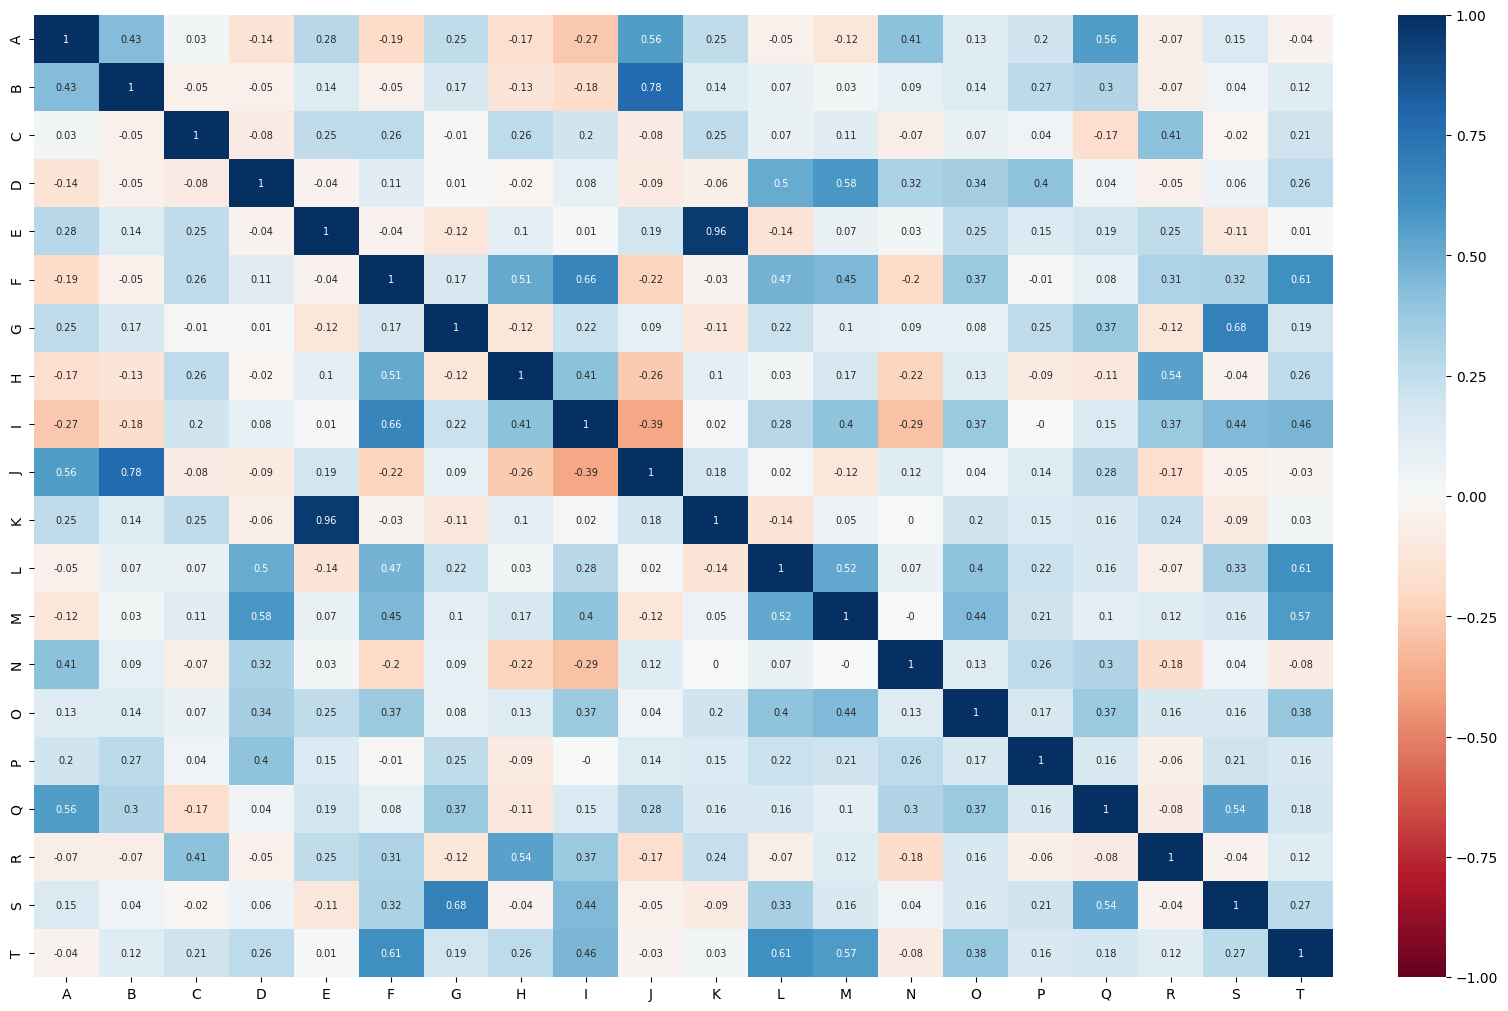

In [9]:
import seaborn as sns 

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 10), layout='constrained')

sns.heatmap(round(corr,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1)